# Imports

On s'autorise l'utilisation de la bibliothèque scientifique python standard mais pas de bibliothèques de machine learning.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Modification de la taille des figures par défaut.
plt.rcParams["figure.figsize"] = (12, 8)

In [4]:
from scipy.optimize import minimize

# Enoncé

A partir d'une fonction $f$ **cible**.
1. Afficher son graphe.
2. Générer des données bruitées représentant la connaissance utilisable de la cible.
3. En utilisant l'erreur quadratique moyenne, déterminer la meilleure approximation affine et comparer la graphiquement à la cible.
4. Même question dans la classe des fonctions polynomiales.

In [5]:
def f(x):
    """Cible à approximer."""
    return np.exp(1. / (2. + np.sin(5 * x) * np.cos(20 * x)))

# Etude sur [0,L]
L = 1.

# Question 1

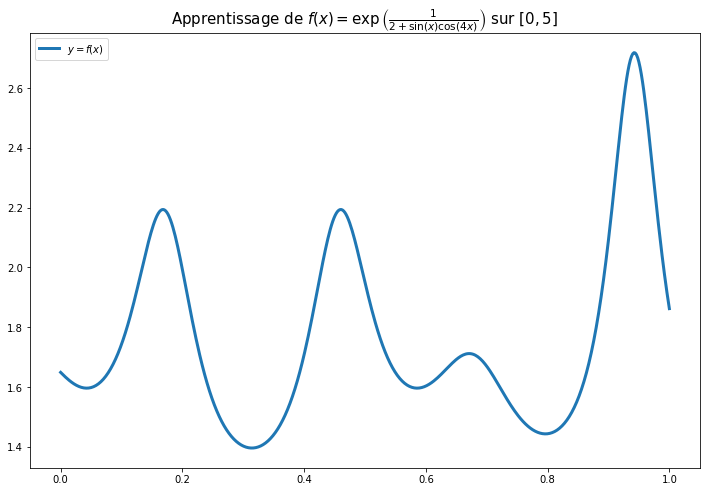

In [6]:
x_aff = np.linspace(0, L, 500)
y_aff = f(x_aff)

fig, rep = plt.subplots()
rep.plot(
    x_aff, 
    y_aff, 
    linewidth=3., 
    label=r"$y=f(x)$"
)
rep.set_title(r"Apprentissage de $f(x)=\exp\left(\frac{1}{2+\sin(x)\cos(4x)}\right)$ sur $[0,5]$",fontsize=15)
rep.legend();

# Question 2

In [7]:
# nombres de points de l'échantillon
N = 20

# contrôle de la taille du bruit
sigma = 0.1

In [8]:
# localisation de l'échantillon non contrôlé
x = np.random.uniform(low=0, high=L, size=(N,)) 
x

array([0.06647016, 0.70587959, 0.64570666, 0.07516837, 0.80159052,
       0.89002056, 0.38356152, 0.997731  , 0.06891808, 0.77961584,
       0.25910563, 0.18109799, 0.21748236, 0.63950698, 0.5547023 ,
       0.03011952, 0.81373125, 0.5695115 , 0.75104442, 0.73154973])

In [9]:
y = f(x)
y

array([1.61806815, 1.6517864 , 1.68417655, 1.63868267, 1.44387042,
       1.93178615, 1.58508466, 1.89226549, 1.62312595, 1.4519186 ,
       1.50768689, 2.15516298, 1.80974239, 1.67198528, 1.63445573,
       1.60142479, 1.45332496, 1.6057843 , 1.50526245, 1.56461531])

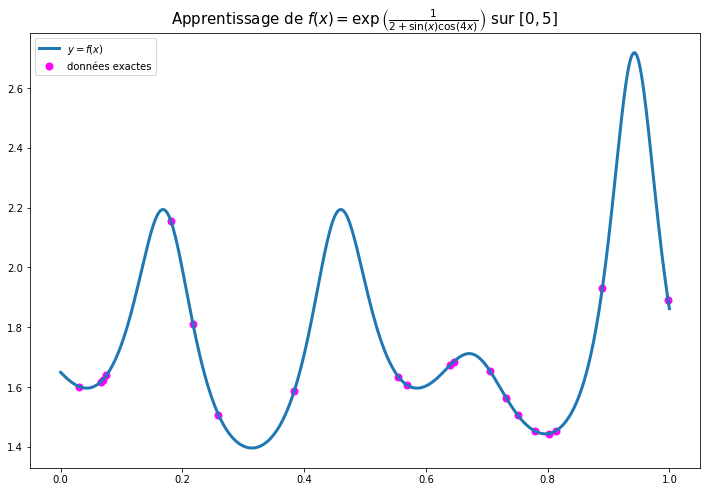

In [10]:
rep.scatter(x, y, label="données exactes", color="magenta",s=49)
rep.legend()
fig

In [11]:
# bruitage par une gaussienne, donc possibilité faible de larges déviation
p = y + np.random.normal(loc=0., scale=sigma, size=y.size)
p

array([1.56171505, 1.65625634, 1.70017115, 1.58276448, 1.50962991,
       1.84547248, 1.75143375, 1.87970715, 1.61249082, 1.60015334,
       1.58234135, 2.34872156, 1.78129401, 1.65510545, 1.60870037,
       1.71626576, 1.50027624, 1.55668317, 1.41165339, 1.64802591])

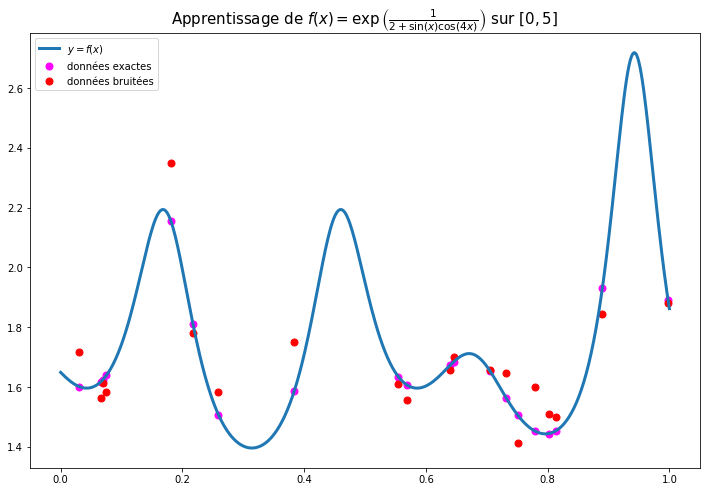

In [12]:
rep.scatter(x, p, color="red", label="données bruitées", s=49)
rep.legend()
fig

# Question 3

In [13]:
def erreur_affine(parametres):
    """Fonction d'erreur quadratique pour approximation affine."""
    a, b = parametres
    return np.sum((a * x + b - p) ** 2) / N
    

In [14]:
# minimisation en boite noire
resultat = minimize(fun=erreur_affine, x0=np.array([0, 0]))
resultat

      fun: 0.035690864033206746
 hess_inv: array([[ 5.25346963, -2.66924794],
       [-2.66924794,  1.85621822]])
      jac: array([-6.05359674e-09,  1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-0.09469775,  1.72356144])

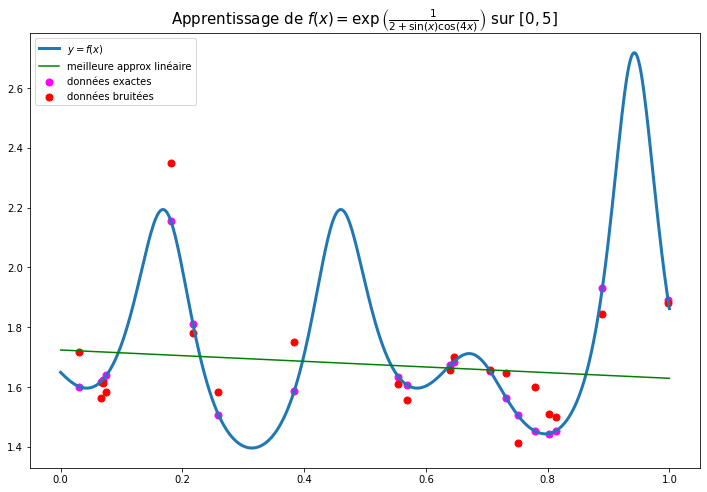

In [15]:
a, b = resultat.x
rep.plot(
    x_aff, 
    a * x_aff + b, 
    color="green", 
    label="meilleure approx linéaire"
)
rep.legend()
fig

# Question 4

In [16]:
# degrés des polynômes utilisés
d = 12

In [17]:
def erreur_polynomiale(coefficients):
    """Fonction d'erreur quadratique pour approximation affine."""
    valeurs = sum( coef * x ** k for k, coef in enumerate(coefficients))
    return np.sum((valeurs - p) ** 2) / N

In [18]:
resultat_poly = minimize(fun=erreur_polynomiale, x0=np.array([1 for _ in range(d+1)]))
resultat_poly

      fun: 0.021631821070913743
 hess_inv: array([[ 1.89140486e+01, -3.46961417e+02,  1.55866615e+03,
        -1.86785352e+03, -8.26008108e+02,  9.73582939e+02,
         1.42552770e+03,  6.94023021e+02, -4.06463141e+02,
        -1.17508358e+03, -1.19873519e+03, -3.15364464e+02,
         1.46689893e+03],
       [-3.46961417e+02,  7.45094609e+03, -3.56437101e+04,
         4.44911198e+04,  1.88728661e+04, -2.39028106e+04,
        -3.41750232e+04, -1.62493443e+04,  1.02653429e+04,
         2.86009678e+04,  2.89196750e+04,  7.39984621e+03,
        -3.57135595e+04],
       [ 1.55866615e+03, -3.56437101e+04,  1.78409050e+05,
        -2.31193392e+05, -9.36438434e+04,  1.28462731e+05,
         1.79012898e+05,  8.26563055e+04, -5.72251640e+04,
        -1.52817148e+05, -1.52864729e+05, -3.76816098e+04,
         1.91147295e+05],
       [-1.86785352e+03,  4.44911198e+04, -2.31193392e+05,
         3.10994321e+05,  1.19191120e+05, -1.79642787e+05,
        -2.43115129e+05, -1.08024849e+05,  8.38684056

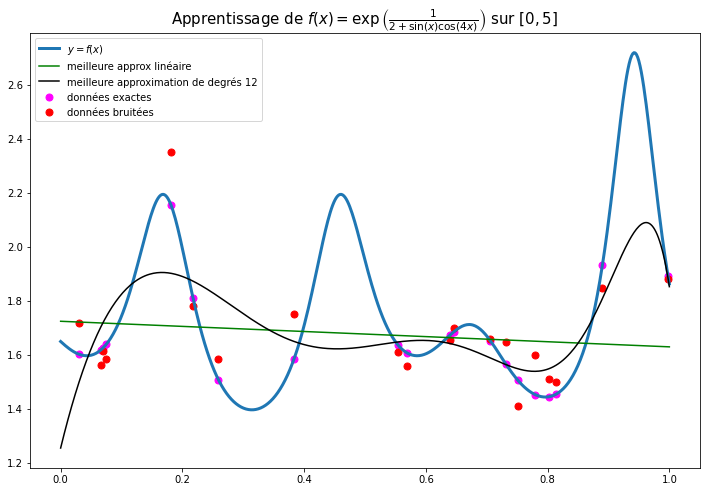

In [19]:
coefficients = resultat_poly.x
rep.plot(
    x_aff,
    sum( coef * x_aff ** k for k, coef in enumerate(coefficients)),
    color="black",
    label=f"meilleure approximation de degrés {d}",
)
rep.legend()
fig

# Remarques

- On a modifié l'intervalle de travail en $[0,1]$ pour contourner les problèmes d'évaluation des polynômes, on pourra essayer de renormaliser en exercice.
- La prédiction finale est décevante mais à ce stade vue la **représentativité** de l'échantillon ce n'est pas si surprenant.